In [7]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
test = pd.read_csv("Corona_NLP_test.csv", encoding='latin-1')
train = pd.read_csv("Corona_NLP_train.csv", encoding='latin-1')

In [36]:
train_con = []
for i in train['Sentiment']:
    if i == 'Neutral': i = 2
    elif i == 'Positive': i = 3
    elif i == 'Extremely Positive': i = 4
    elif i == 'Negative': i = 1
    elif i == 'Extremely Negative': i = 0
    train_con.append(i)
    
test_con = []
for i in test['Sentiment']:
    if i == 'Neutral': i = 2
    elif i == 'Positive': i = 3
    elif i == 'Extremely Positive': i = 4
    elif i == 'Negative': i = 1
    elif i == 'Extremely Negative': i = 0
    test_con.append(i)
    
train_con = torch.tensor(train_con)
test_con = torch.tensor(test_con)

In [37]:
train_con.shape, test_con.shape

(torch.Size([41157]), torch.Size([3798]))

In [48]:
train_oh = F.one_hot(train_con, num_classes = 5).float()
test_oh = F.one_hot(test_con, num_classes = 5).float()

In [49]:
train_oh

tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

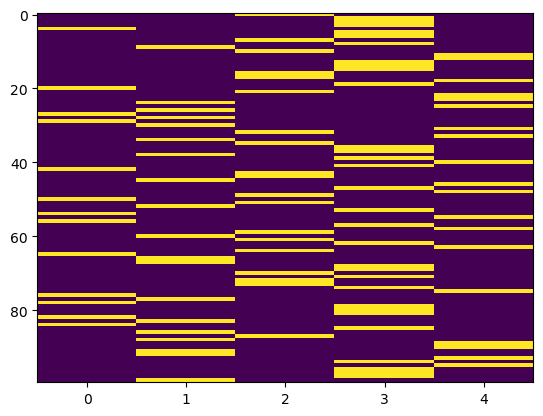

In [58]:
plt.imshow(train_oh[:100], aspect = 'auto')

In [95]:
# Initialize Network
g = torch.Generator().manual_seed(2147)
W = torch.randn((5, 100), generator=g, requires_grad=True)
y = torch.randint(0,4,(41157,))

In [96]:
stepi = []
lossi = []

# Gradient Descent
for k in range(100):
  
  # Forward Pass
  train_oh = F.one_hot(train_con, num_classes = 5).float() # One-hot encoding
  logits = train_oh @ W 
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True) # Here I assumed the sentiments are interrelated...when it's clearly not -_- how fun
  loss = -probs[torch.arange(41157), y].log().mean() + 0.01*(W**2).mean()
  
  # Backpropagation
  W.grad = None # Set gradient back to zero
  loss.backward()
  
  # Update
  W.data += -12 * W.grad  

  stepi.append(k)
  lossi.append(loss.item())

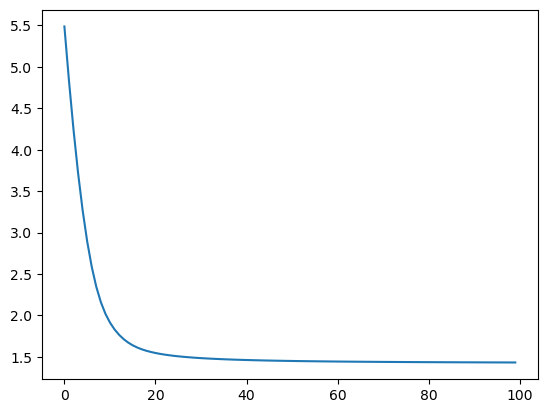

In [97]:
plt.plot(stepi, lossi)